In [22]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd

In [23]:
df = pd.read_csv (r'winemag-data-130k-v2.csv')
print(df.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [24]:
import re
mylist = df['title'] # init the list
df["year"] = np.ones(df['title'].shape)
for i, l in enumerate(mylist):
    match = re.match(r'.*([1-2][0-9]{3})', l)
    if match is not None:
        # Then it found a match!
        df.at[i,'year'] = int(match.group(1))

In [25]:
y = df['points']
x = df.drop('points',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
print(x_train.shape, y_train.shape)

(103976, 14) (103976,)


In [27]:
print(x_test.shape,y_test.shape)

(25995, 14) (25995,)


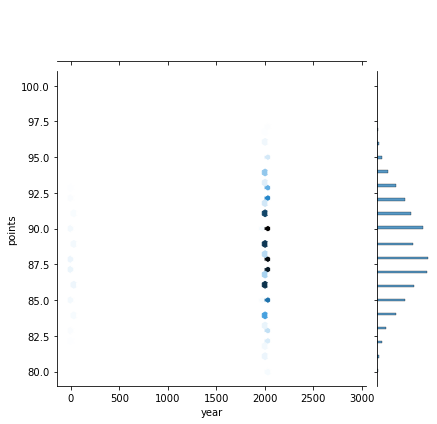

In [28]:
sns.jointplot(
    data=df,
    x="year", y="points",kind="hex"
)


In [29]:
df['year']

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: year, Length: 129971, dtype: float64

In [30]:
df['year'].loc[lambda s: s < 1800 ]

63           1.0
69           1.0
213       1105.0
237          1.0
315          1.0
           ...  
129710       1.0
129719       1.0
129743       1.0
129869       1.0
129929       1.0
Name: year, Length: 4706, dtype: float64

In [31]:
new_df = df.drop(np.append(df['year'].loc[lambda s: s < 1980 ].index.values,df['year'].loc[lambda s: s > 2022 ].index.values))

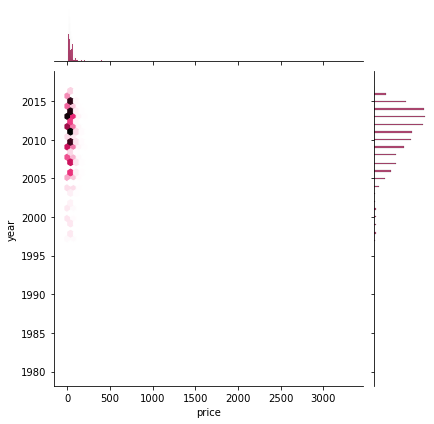

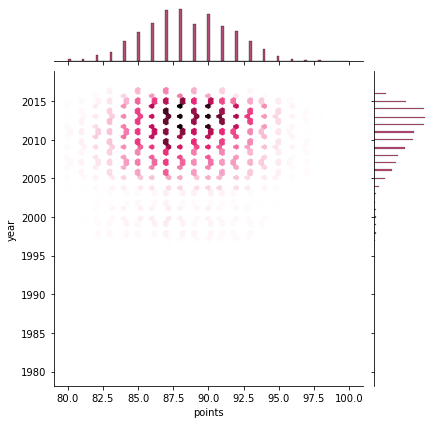

In [32]:
# sns.relplot(
#     data=new_df,
#     x="price", y="year",
# )
sns.jointplot(data=new_df, x="price", y="year", kind="hex", color="#9C0F48")
# sns.relplot(
#     data=new_df,
#     x="points", y="year",
# )
sns.jointplot(data=new_df, x="points", y="year", kind="hex", color="#9C0F48")


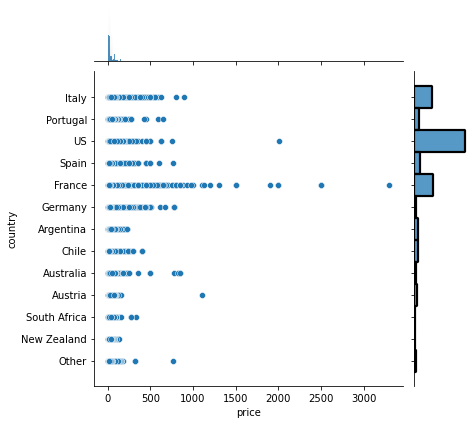

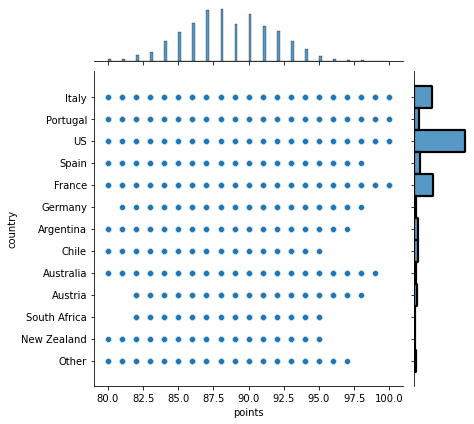

In [33]:

p_df = new_df.copy().dropna(subset=['country'])
province_count = new_df['country'].value_counts()
for index, value in province_count.items():
    if value/new_df['country'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")
sns.jointplot(
    data=p_df, x="price", y="country"
)
sns.jointplot(
    data=p_df, x="points", y="country"
)

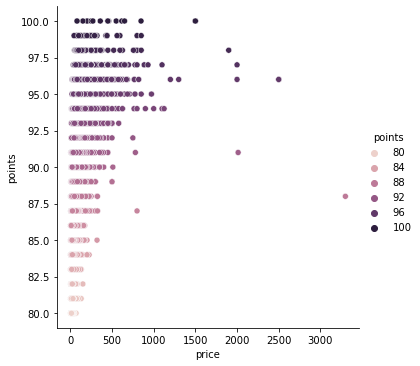

In [34]:
sns.relplot(
    data=new_df,
    hue="points",x="price", y="points",
)

In [35]:
p_df = new_df.copy().dropna(subset=['province'])
province_count = new_df['province'].value_counts()
for index, value in province_count.items():
    if value/new_df['province'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")

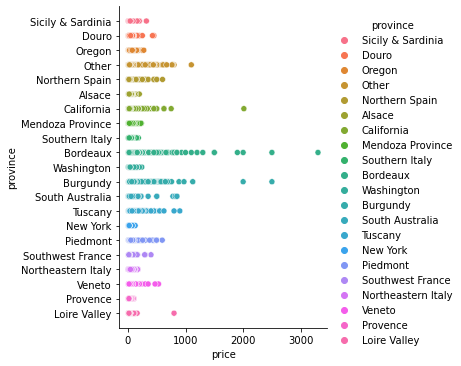

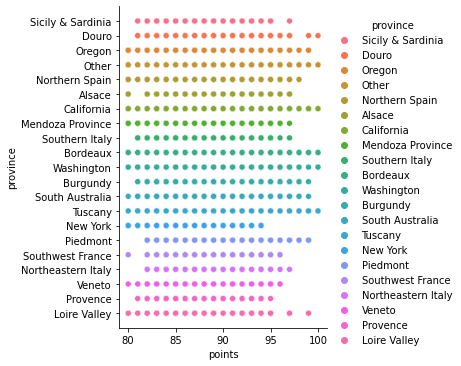

In [36]:
sns.relplot(
    data=p_df,
    hue="province",x="price", y="province",
)
sns.relplot(
    data=p_df,
    hue="province",x="points", y="province"
)

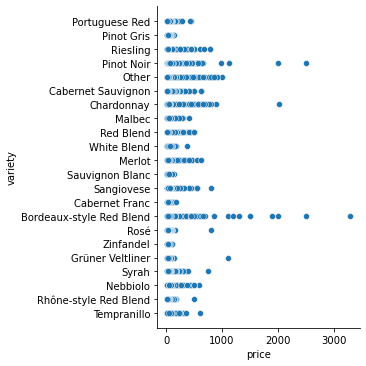

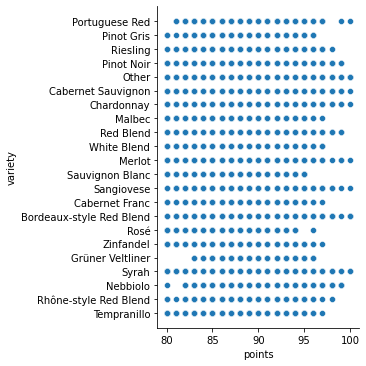

In [37]:
p_df = new_df.copy().dropna(subset=['variety','price','points'])
province_count = new_df['variety'].value_counts()
for index, value in province_count.items():
    if value/new_df['variety'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")
sns.relplot(
    data=p_df, x="price", y="variety"
)
sns.relplot(
    data=p_df, x="points", y="variety"
)

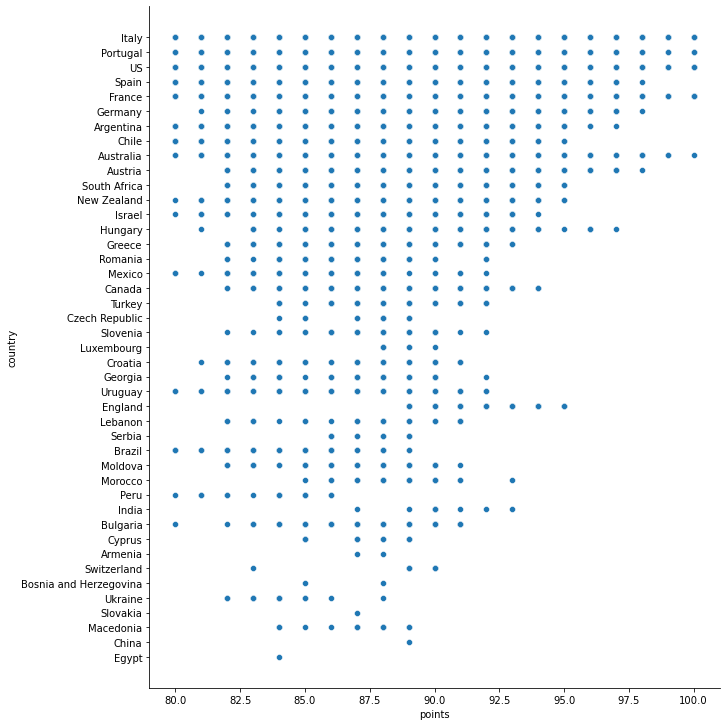

In [38]:
# Create a visualization
sns.relplot(
    x="points", y="country", data=df,
    height = 10
)

In [39]:
# #Create a visualization of points related to winery
# sns.relplot(
#     x="points", y="winery",data=df,
#     height = 10
# )
# p_df = df.copy()
# province_count = df['winery'].value_counts()
# for index, value in province_count.items():
#     if value/df['winery'].shape[0] < 0.01:
#         p_df = p_df.replace(index,"Other")
# sns.relplot(
#     data=p_df,
#     hue="winery",x="points", y="winery",
# )

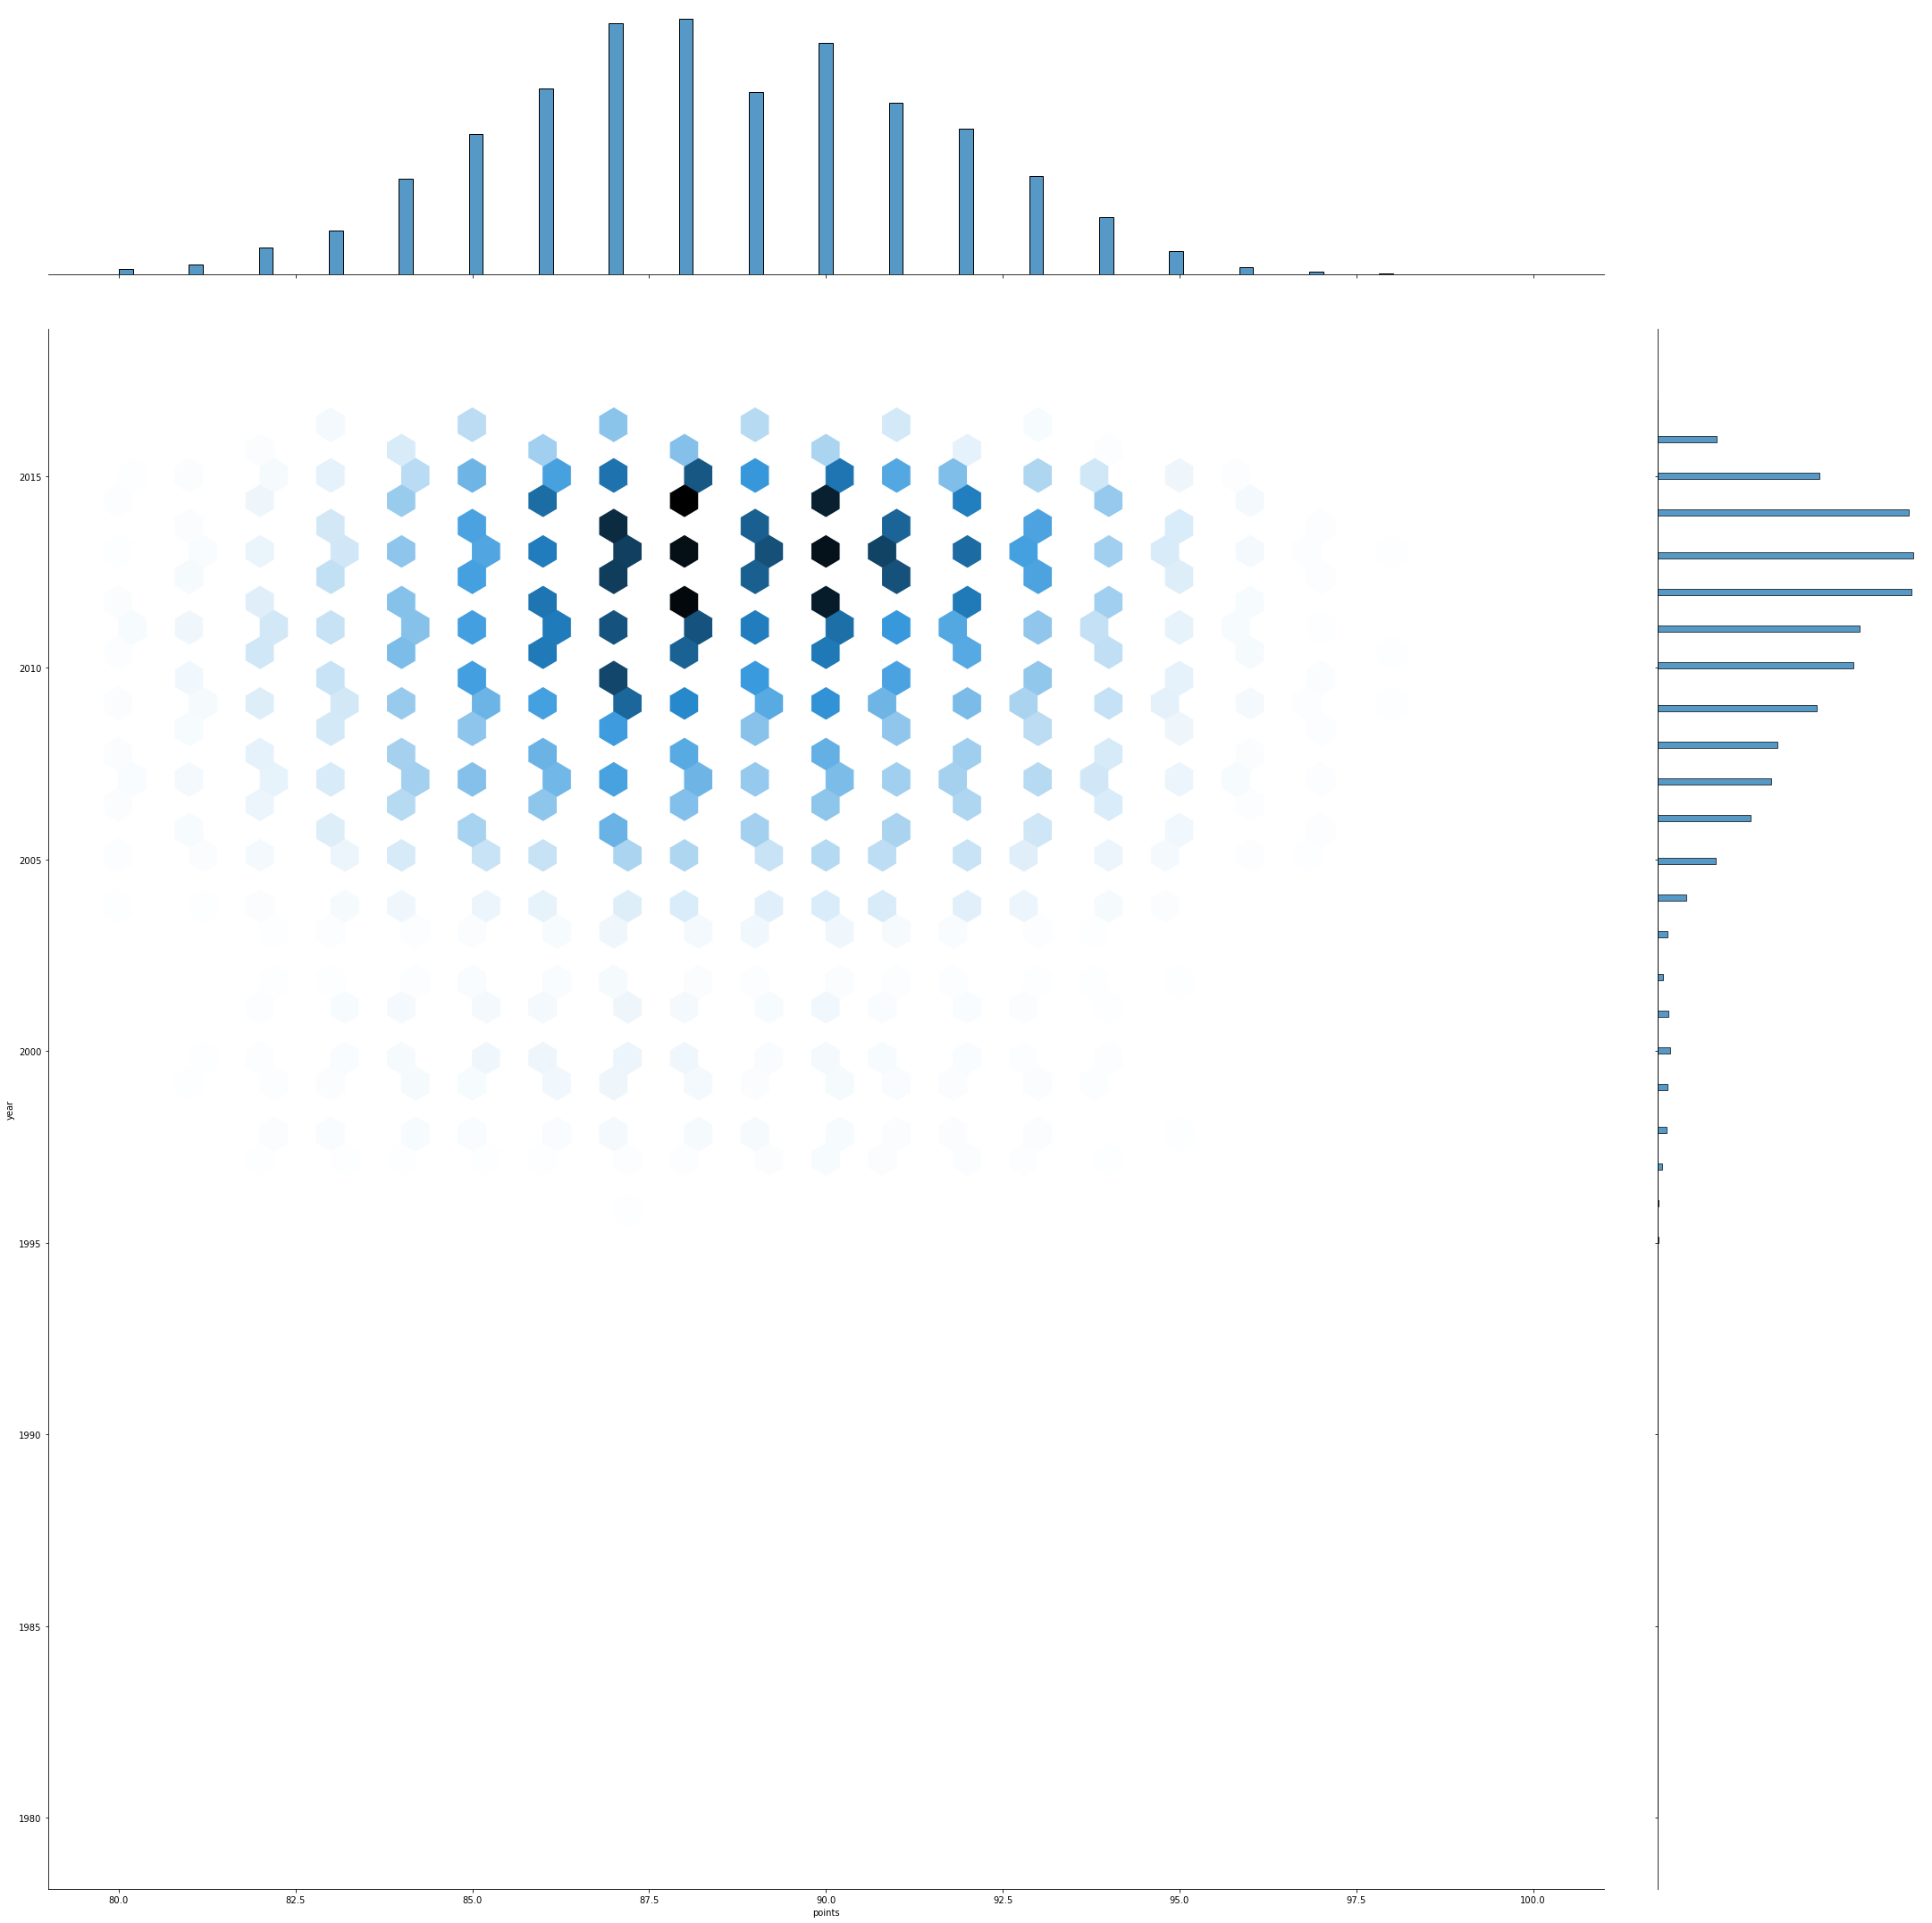

In [40]:
#Create a visualization of points related to province
sns.jointplot(
    x="points", y="year", kind='hex', data=new_df,
    height = 30
)

In [41]:
# # Create a visualization
# sns.relplot(
#     x="points", y="designation", data=df,
#     height = 30
# )

In [42]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013.0
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012.0


# Machine Learning part

In [43]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd

In [44]:
df = pd.read_csv (r'winemag-data-130k-v2.csv')
print(df.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [45]:
import re
mylist = df['title']  # init the list
df["year"] = np.ones(df['title'].shape)
for i, l in enumerate(mylist):
    match = re.match(r'.*([1-2][0-9]{3})', l)
    if match is not None:
        # Then it found a match!
        df.at[i, 'year'] = int(match.group(1))
new_df = df.drop(np.append(df['year'].loc[lambda s: s < 1980].index.values,
                 df['year'].loc[lambda s: s > 2022].index.values))

# Labling the column variety into variables 
mappings = {}
labels = ['variety','winery','region_1','country','province']
for i in labels:
	label_encoder = preprocessing.LabelEncoder()
	df = df.dropna(subset=[i])
	df[i] = label_encoder.fit_transform(df[i])
	mappings[i] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

In [46]:
df = df._get_numeric_data()
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
df.dropna(inplace=True)
y = df['points']
x = df.drop(['points'], axis=1)
# pca = PCA(n_components=1)
# x = pca.fit_transform(x)
print(x.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

(101400, 7)


In [48]:

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5, p = 1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


correct_predictions = 0
# iterate over each label and check
for true, predicted in zip(y_test, y_pred):
	if abs(true - predicted) < 2.5:
		correct_predictions += 1
# compute the accuracy
accuracy = correct_predictions/len(y_test)
accuracy


0.6993006993006993

c:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


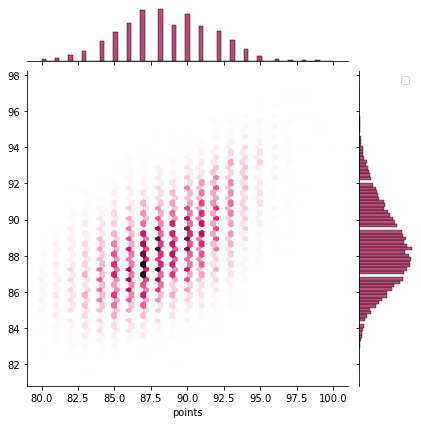

In [49]:
import matplotlib.pyplot as plt
sns.jointplot(y_test, y_pred, kind="hex", color="#9C0F48")
plt.legend()
plt.show()


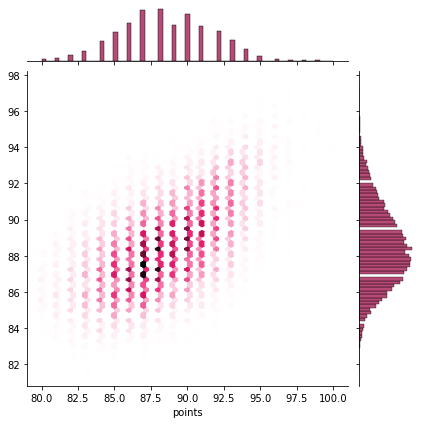

In [50]:

sns.jointplot(x=y_test, y=y_pred, kind="hex", color="#9C0F48")


In [21]:
#wine chemical

In [34]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd

In [35]:
red = pd.read_csv (r'chem/winequality-red.csv')
print(red.columns)
red.dropna(thresh=2)
normal_red = preprocessing.normalize(red)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [36]:
white = pd.read_csv (r'chem/winequality-white.csv',sep = ';',engine = 'python')
print(white.columns)
normal_white = preprocessing.normalize(white)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [37]:
#assign each dataset a color
red['color'] = 'red'
white['color'] = 'white'
#merge them
wine = pd.concat([red, white])
# wine

In [38]:
wine.dropna(thresh=5)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
#Quality of Wine

In [39]:
info = wine[['fixed acidity']].describe()
red_info = wine[wine["color"].str.contains("white") == False]
red_info

quality_r =[]
for i in range (3,9):
    count_r = red_info[red_info["quality"]==i].count()
    quality_r.append(count_r['fixed acidity'])


quality_r
    
        


[10, 53, 681, 638, 199, 18]

In [40]:
white_info = wine[wine["color"].str.contains("red") == False]
white_info

quality_w =[]
for i in range (3,9):
    count_w = white_info[white_info["quality"]==i].count()
    quality_w.append(count_w['fixed acidity'])

quality_w
    

[20, 163, 1457, 2198, 880, 175]

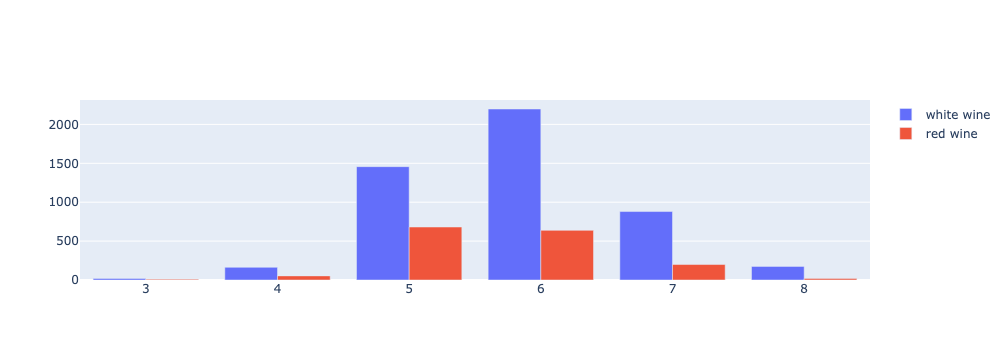

In [41]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='white wine', x=np.arange(3,9), y=quality_w),
    go.Bar(name='red wine', x=np.arange(3,9), y=quality_r)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [62]:
red_alc = wine[wine["color"].str.contains("white") == False]
red_alc
white_alc = wine[wine["color"].str.contains("red") == False]
white_alc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# Alcohol contains 

In [84]:
alc_r =[]
for i in [8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]:
    countAlc_r = red_info[red_info["alcohol"]<=i].count()
    # print(countAlc_r)
    alc_r.append(countAlc_r['fixed acidity'])


alc_r
    

[3, 37, 436, 747, 983, 1191, 1349, 1458, 1529, 1576, 1586, 1598, 1598, 1599]

In [85]:
alc_w =[]
for i in [8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0]:
    countAlc_w = white_info[white_info["alcohol"]<=i].count()
    # print(countAlc_r)
    alc_w.append(countAlc_w['fixed acidity'])


alc_w

[14,
 502,
 1436,
 2085,
 2735,
 3337,
 3857,
 4187,
 4543,
 4796,
 4869,
 4896,
 4898,
 4898]

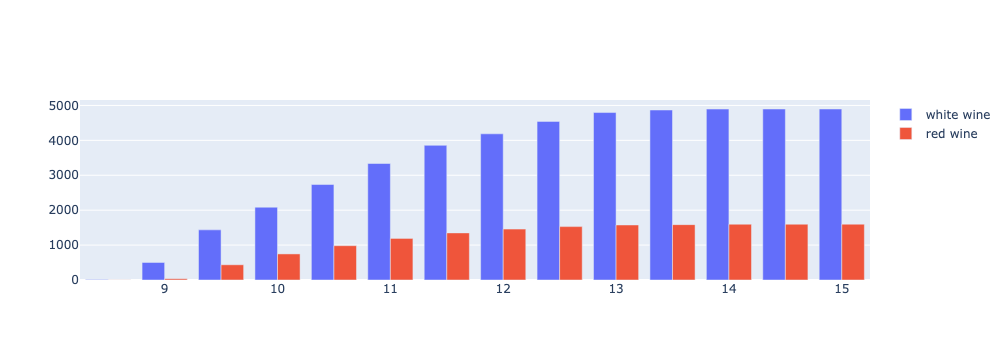

In [87]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='white wine', x=[8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0], y=alc_w),
    go.Bar(name='red wine', x=[8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0], y=alc_r)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [88]:
#pH contains
ph_r =[]
for i in [3.0,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]:
    countPh_r = red_info[red_info["pH"]<=i].count()
    # print(countAlc_r)
    ph_r.append(countPh_r['fixed acidity'])


ph_r

[35, 134, 388, 783, 1212, 1431, 1551, 1583, 1594, 1597, 1597]

In [89]:
ph_w =[]
for i in [3.0,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]:
    countPh_w = white_info[white_info["pH"]<=i].count()
    # print(countAlc_r)
    ph_w.append(countPh_w['fixed acidity'])


ph_w

[511, 1449, 2842, 3891, 4501, 4757, 4855, 4882, 4896, 4898, 4898]

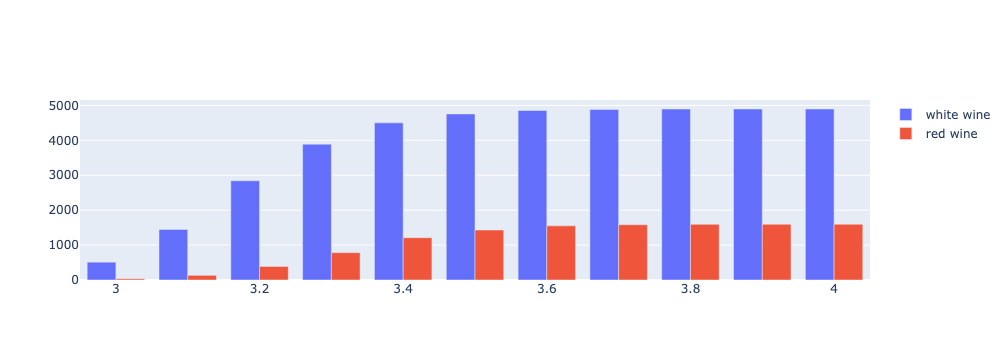

In [90]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='white wine', x=[3.0,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0], y=ph_w),
    go.Bar(name='red wine', x=[3.0,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0], y=ph_r)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()